In [1]:
import numpy as np

In [2]:
import scipy
from scipy.io import loadmat
from data_generator import DataGenerator

In [3]:
from likelihood import GaussianLogLikelihood
from prior import ComplexityLogPrior
from posterior import LogPosterior
from mcmc import MCMC
from sequential_mc import SequentialMC
from util import generate_binary_coef_random
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [ ]:
data = loadmat('../data/phase_field_oneD_simulation_beginning_stage.mat')

In [ ]:
# calculate derivatives and prepare data
u = data['usol']
t = np.squeeze(data['t'])
x = np.squeeze(data['x'])
from numerical_derivative import ChebyshevLocalFit_1D
width = 5                
du_x, du_xx, du_t = ChebyshevLocalFit_1D(u, x, t, deg=3, width=width, diff=2)
u = u[width:(-width), width:(-width)]

n_samples = 5000

u = u.flatten()
du_x = du_x.flatten()
du_xx = du_xx.flatten()
du_t = du_t.flatten()

data = np.vstack([u,du_x,du_xx, du_t]).T

np.random.seed(1001)

np.random.shuffle(data)
data = data[:n_samples]

np.save('raw_data', data)

In [ ]:
data = np.load('train_data_simulation.npy')

In [ ]:
dg = DataGenerator()

In [ ]:
data[:,:-1].shape

In [ ]:
X, names = dg(data[:,:-1], descriptions=['u','u_x','u_xx'] )

In [ ]:
X.shape

In [ ]:
Y = data[:,-1]
#Y = -0.9*X[:,0] + 10.*X[:,2] +1.9*X[:,3] -1.*X[:,9]

In [ ]:
prior = ComplexityLogPrior(method='num_terms', simplicity_preference=10.)

In [18]:
likelihood = GaussianLogLikelihood(X,Y,reg_normalization=False)

In [19]:
posterior = LogPosterior(prior, likelihood)

In [20]:
import itertools

In [21]:
init_coefs = generate_binary_coef_random(len(names),40)

In [22]:
sequentialmc = SequentialMC(posterior=posterior,log_file='mc.csv')

In [23]:
for i, name in enumerate(names):
    print (i, name)

0 1
1 u
2 u_x
3 u_xx
4 u**2
5 u*u_x
6 u*u_xx
7 u_x**2
8 u_x*u_xx
9 u_xx**2
10 u**3
11 u**2*u_x
12 u**2*u_xx
13 u*u_x**2
14 u*u_x*u_xx
15 u*u_xx**2
16 u_x**3
17 u_x**2*u_xx
18 u_x*u_xx**2
19 u_xx**3


In [24]:
pareto_set = sequentialmc(samples=init_coefs,beta0_nsteps=0,beta0to1_nsteps=100,beta1_nsteps=100, mcmc_nsteps=10,feature_descriptions=names )

step: 0, beta:  0.000
step: 1, beta:  0.010
step: 2, beta:  0.020
step: 3, beta:  0.030
step: 4, beta:  0.040
step: 5, beta:  0.051
step: 6, beta:  0.061
step: 7, beta:  0.071
step: 8, beta:  0.081
step: 9, beta:  0.091
step: 10, beta:  0.101
step: 11, beta:  0.111
step: 12, beta:  0.121
step: 13, beta:  0.131
step: 14, beta:  0.141
step: 15, beta:  0.152
step: 16, beta:  0.162
step: 17, beta:  0.172
step: 18, beta:  0.182
step: 19, beta:  0.192
step: 20, beta:  0.202
step: 21, beta:  0.212
step: 22, beta:  0.222
step: 23, beta:  0.232
step: 24, beta:  0.242
step: 25, beta:  0.253
step: 26, beta:  0.263
step: 27, beta:  0.273
step: 28, beta:  0.283
step: 29, beta:  0.293
step: 30, beta:  0.303
step: 31, beta:  0.313
step: 32, beta:  0.323
step: 33, beta:  0.333
step: 34, beta:  0.343
step: 35, beta:  0.354
step: 36, beta:  0.364
step: 37, beta:  0.374
step: 38, beta:  0.384
step: 39, beta:  0.394
step: 40, beta:  0.404
step: 41, beta:  0.414
step: 42, beta:  0.424
step: 43, beta:  0.43

In [25]:
pareto_set = sequentialmc.pareto_set

In [26]:
array = pareto_set.to_array()

In [27]:
array

array([[0.00000000e+00, 2.93230023e+00],
       [5.00000000e-02, 8.23426159e-01],
       [1.00000000e-01, 3.66342168e-01],
       [1.50000000e-01, 2.00307590e-01],
       [2.00000000e-01, 4.41226430e-05],
       [2.50000000e-01, 9.03621667e-06],
       [3.00000000e-01, 8.00781629e-06],
       [3.50000000e-01, 5.33818897e-06],
       [4.00000000e-01, 8.23977961e-07],
       [4.50000000e-01, 6.38846884e-07],
       [5.00000000e-01, 5.72978503e-07],
       [5.50000000e-01, 4.68492052e-07],
       [6.00000000e-01, 3.68452992e-07],
       [6.50000000e-01, 1.93436347e-07],
       [7.00000000e-01, 1.68857098e-07],
       [8.00000000e-01, 1.24349206e-07]])

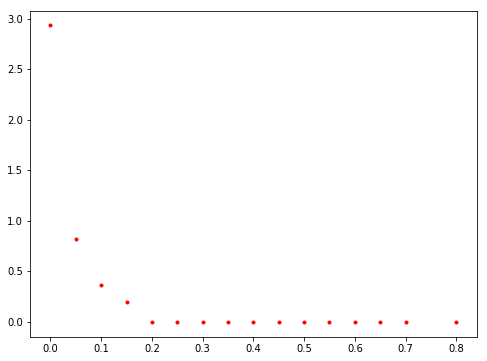

In [28]:
pareto_set.plot()

In [37]:
pareto_set[0].data

0

In [38]:
pareto_set[1].data

-4.02625439764032*u_x

In [39]:
pareto_set[2].data

0.493491307019347*u**2 - 0.461572065873419*u

In [40]:
pareto_set[3].data

6.10732514369031*u**2*u_x + 0.597655757457876*u**2 - 0.579708543166228*u

In [41]:
pareto_set[4].data

-1.00825304235675*u**3 + 1.91197907720998*u**2 - 0.903843172700869*u + 10.3540837933683*u_xx

In [42]:
pareto_set[5].data

-1.0029908017627*u**3 + 1.90412649428831*u**2 - 0.901272418136458*u + 37.5667312918843*u_x*u_xx + 9.4270439158532*u_xx

In [43]:
pareto_set[6].data

-1.00287883115703*u**3 + 1.90376164131706*u**2 + 82.5100743234686*u*u_x*u_xx - 0.90101505086035*u + 242.346115909425*u_xx**2 + 9.39016420734836*u_xx

In [44]:
pareto_set.save_csv('pareto_set_simulation.csv')